### Collateral vs debt change

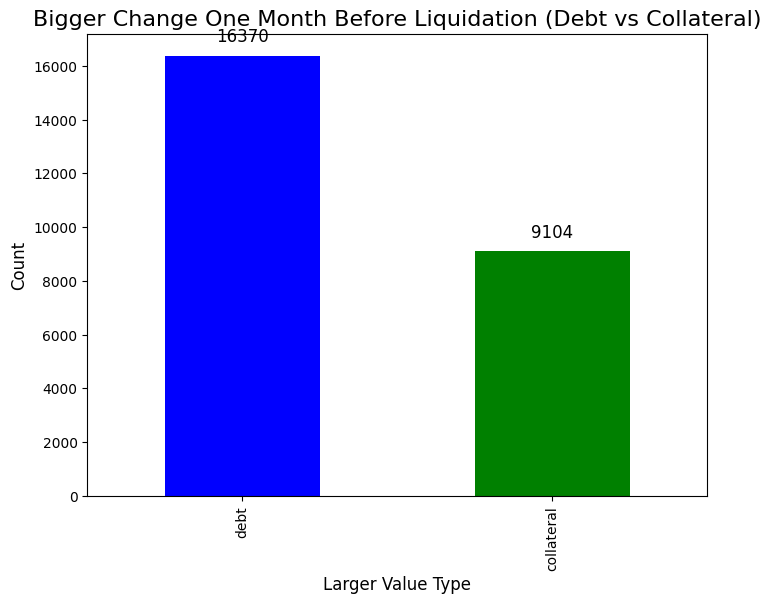

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Load the DataFrame
df = pd.read_csv("../data/aave_v2_LiquidationCall_with_total_collateral_debt_final.csv")

# Select relevant columns for statistics
relevant_columns = [
    'total_debt', 
    'total_debt_one_day_before',
    'total_collateral',
    'total_collateral_one_day_before',
    'collateral_debt_ratio', 
    'collateral_debt_ratio_one_day_before', 
    'debt_collateral_ratio', 
    'debt_collateral_ratio_one_day_before',
    'debt_value_change_one_day (in %)',
    'collateral_value_change_one_day (in %)'
]
# Create a new column that subtracts collateral_debt_ratio from collateral_debt_ratio_one_day_before
df['collateral_debt_ratio_difference'] = df['collateral_debt_ratio'] - df['collateral_debt_ratio_one_day_before']

# Create a new column that stores the larger absolute value between 'debt_value_change_one_day (in %)' and 'collateral_value_change_one_day (in %)'
df['larger_value_type'] = df.apply(
    lambda row: 'collateral' if abs(row['collateral_value_change_one_day (in %)']) > abs(row['debt_value_change_one_day (in %)']) else 'debt',
    axis=1
)

updated_df = df[df['collateral_debt_ratio_difference'] < 0]

# Count the occurrences of 'collateral' and 'debt' in the 'larger_value_type' column
value_counts = updated_df['larger_value_type'].value_counts()

# Create a bar plot for the 'larger_value_type' column
plt.figure(figsize=(8, 6))
ax = value_counts.plot(kind='bar', color=['blue', 'green'])

# Add labels and title
plt.title('Bigger Change One Month Before Liquidation (Debt vs Collateral)', fontsize=16)
plt.xlabel('Larger Value Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add the count values on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

# Display the plot
plt.show()

### Correlation between debt and collateral value change 1 day before liquidation

Correlation between debt value change and collateral value change a day before liquidation: 0.55


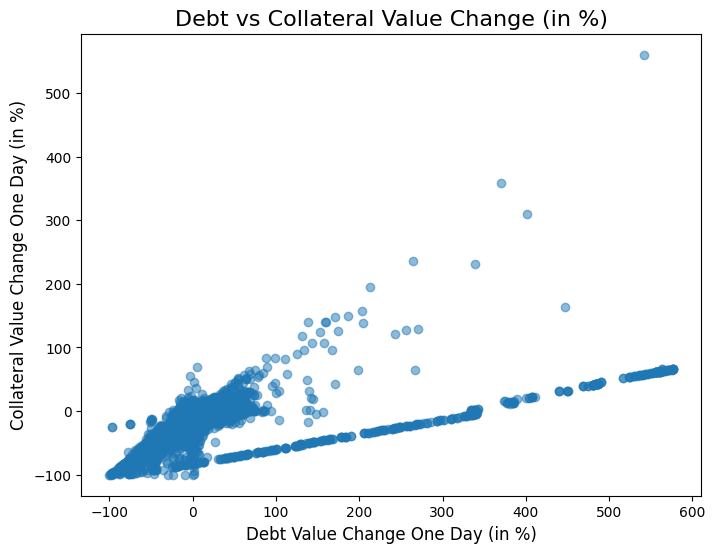

In [3]:
#Choose a reasonable value to filter out outliers
outlier_val = 600

# Filter out extreme outliers for more reasonable statistics
filtered_df = df[(df['debt_value_change_one_day (in %)'].abs() < outlier_val) & 
                 (df['collateral_value_change_one_day (in %)'].abs() < outlier_val)]

# Calculate the correlation between 'debt_value_change_one_day (in %)' and 'collateral_value_change_one_day (in %)'
correlation = filtered_df[['debt_value_change_one_day (in %)', 'collateral_value_change_one_day (in %)']].corr()

# Display the correlation value
print('Correlation between debt value change and collateral value change a day before liquidation:', round(correlation['debt_value_change_one_day (in %)']['collateral_value_change_one_day (in %)'],2))

# Scatter plot to visualize the relationship between debt_value_change_one_day (in %) and collateral_value_change_one_day (in %)
plt.figure(figsize=(8, 6))
plt.scatter(filtered_df['debt_value_change_one_day (in %)'], filtered_df['collateral_value_change_one_day (in %)'], alpha=0.5)

# Add labels and title
plt.title('Debt vs Collateral Value Change (in %)', fontsize=16)
plt.xlabel('Debt Value Change One Day (in %)', fontsize=12)
plt.ylabel('Collateral Value Change One Day (in %)', fontsize=12)

# Display the plot
plt.show()

### General Stats

In [4]:
# Select relevant columns for statistics
#Note total_debt, total_debt_one_day_before, total_collateral, total_collateral_one_day_before are in ETH
relevant_columns = [
    'total_debt', 
    'total_debt_one_day_before',
    'total_collateral',
    'total_collateral_one_day_before',
    'collateral_debt_ratio', 
    'collateral_debt_ratio_one_day_before', 
    'debt_collateral_ratio', 
    'debt_collateral_ratio_one_day_before',
    'debt_value_change_one_day (in %)',
    'collateral_value_change_one_day (in %)'
]

# Generate statistics for the relevant columns
stats_df = df[relevant_columns].describe()

# Set the option to display all rows and display the statistics
pd.set_option('display.max_rows', None)
display(stats_df)

,total_debt,total_debt_one_day_before,total_collateral,total_collateral_one_day_before,collateral_debt_ratio,collateral_debt_ratio_one_day_before,debt_collateral_ratio,debt_collateral_ratio_one_day_before,debt_value_change_one_day (in %),collateral_value_change_one_day (in %)
count,2.889800e+04,2.889800e+04,2.889800e+04,2.889800e+04,2.889800e+04,2.889800e+04,2.889800e+04,2.889800e+04,2.889800e+04,2.889800e+04
mean,6.895881e+02,3.747972e+02,7.693236e+02,8.717899e+02,1.199232e+00,1.444627e+00,3.262742e+05,3.606025e+02,6.003718e+05,5.530417e+05
std,8.296185e+03,6.164513e+03,9.595563e+03,9.930472e+03,2.868617e+00,1.405658e+01,5.330124e+07,6.047289e+04,1.020592e+08,9.401547e+07
min,3.009398e-07,2.053037e-08,3.285360e-11,1.121284e-09,1.104086e-10,9.727803e-08,2.201824e-03,4.278805e-04,-9.988071e+01,-1.000000e+02
25%,7.281803e-01,7.364675e-01,7.903808e-01,8.588896e-01,1.136467e+00,1.180253e+00,7.830327e-01,6.952671e-01,-6.184610e+00,-1.470431e+01
50%,2.932567e+00,3.183644e+00,3.568845e+00,4.204168e+00,1.184205e+00,1.291838e+00,8.444486e-01,7.740910e-01,3.052172e+00,-3.298601e-01
75%,1.522214e+01,1.647341e+01,1.920317e+01,2.300419e+01,1.277086e+00,1.438296e+00,8.799203e-01,8.472757e-01,1.000097e+01,2.911780e-03
max,2.483074e+05,1.919478e+05,2.918010e+05,2.856919e+05,4.541689e+02,2.337101e+03,9.057269e+09,1.027981e+07,1.734947e+10,1.598208e+10


### General Stats (After Removing Outliers)

In [5]:
# Identify extreme outliers by sorting and selecting relevant columns
top_debt_change = df[['user', 'debt_value_change_one_day (in %)']].sort_values(by='debt_value_change_one_day (in %)', ascending=False).reset_index(drop=True).head(10)
top_collateral_change = df[['user', 'collateral_value_change_one_day (in %)']].sort_values(by='collateral_value_change_one_day (in %)', ascending=False).reset_index(drop=True).head(10)

# Filter out extreme outliers for more reasonable statistics
df_filtered = df[(df['debt_value_change_one_day (in %)'].abs() < 10000) & 
                 (df['collateral_value_change_one_day (in %)'].abs() < 10000)]

# Print statistics for the filtered data (select relevant columns for stats)
relevant_columns = [
    'total_debt', 
    'total_debt_one_day_before',
    'total_collateral',
    'total_collateral_one_day_before',
    'collateral_debt_ratio', 
    'collateral_debt_ratio_one_day_before', 
    'debt_collateral_ratio', 
    'debt_collateral_ratio_one_day_before',
    'debt_value_change_one_day (in %)',
    'collateral_value_change_one_day (in %)'
]
stats_filtered = df_filtered[relevant_columns].describe()

# Display all tables with separate titles
display(HTML('<h3>Top 10 largest values for "debt_value_change_one_day (in %)"</h3>'))
display(HTML(top_debt_change.to_html(classes='table table-striped', notebook=True)))

display(HTML('<h3>Top 10 largest values for "collateral_value_change_one_day (in %)"</h3>'))
display(HTML(top_collateral_change.to_html(classes='table table-striped', notebook=True)))

display(HTML('<h3>Statistics for filtered data (excluding extreme outliers)</h3>'))
display(HTML(stats_filtered.to_html(classes='table table-striped', notebook=True)))

,user,debt_value_change_one_day (in %)
0,0xa013A178933a97E11f3ECCbfFeFe7d102Ddf7cAc,1.734947e+10
1,0x433EbD14E7e3cFE790013FC70eA50302e0B29f4B,4.900782e+03
2,0xAf8E8A5f9EB16F4E1Ce5C16e01c66C41fdb3CecF,4.357870e+03
3,0xafbaAe8d701cbc97D29AB8bF729C3d22DaB488aF,2.826766e+03
4,0x95e2968896E9bB0307745257505adbED5C1e98bf,2.784751e+03
5,0xACDd5528C1c92b57045041b5278Efa06cDAdE4d8,1.252845e+03
6,0xe1d18ae098FFB1AD301e0609180f155B329A710A,1.218381e+03
7,0x2B20B944B96D11F5EcF5408c116fd0f13784B7Cb,1.074726e+03
8,0x2aDE020b823804842D29BC9b14E01eF65CC16e06,9.347279e+02
9,0x57E04786E231Af3343562C062E0d058F25daCE9E,5.767712e+02


,user,collateral_value_change_one_day (in %)
0,0xa013A178933a97E11f3ECCbfFeFe7d102Ddf7cAc,1.598208e+10
1,0x433EbD14E7e3cFE790013FC70eA50302e0B29f4B,4.752107e+03
2,0xAf8E8A5f9EB16F4E1Ce5C16e01c66C41fdb3CecF,3.918347e+03
3,0xACDd5528C1c92b57045041b5278Efa06cDAdE4d8,1.107432e+03
4,0xe1d18ae098FFB1AD301e0609180f155B329A710A,1.095972e+03
5,0x4b2dE0cbd1301C7155515dec509CB97C3b9ae77C,5.599171e+02
6,0x2aDE020b823804842D29BC9b14E01eF65CC16e06,5.004031e+02
7,0xeC3C215EC5c8c7337dD2465D29a9eb70860B73D8,3.577826e+02
8,0x95e2968896E9bB0307745257505adbED5C1e98bf,3.395790e+02
9,0x2B20B944B96D11F5EcF5408c116fd0f13784B7Cb,3.138272e+02


,total_debt,total_debt_one_day_before,total_collateral,total_collateral_one_day_before,collateral_debt_ratio,collateral_debt_ratio_one_day_before,debt_collateral_ratio,debt_collateral_ratio_one_day_before,debt_value_change_one_day (in %),collateral_value_change_one_day (in %)
count,2.889700e+04,28897.000000,2.889700e+04,2.889700e+04,2.889700e+04,2.889700e+04,2.889700e+04,2.889700e+04,28897.000000,28897.000000
mean,6.896118e+02,374.810189,7.693500e+02,8.718201e+02,1.199232e+00,1.444631e+00,3.262855e+05,3.606150e+02,2.516022,-9.613776
std,8.296328e+03,6164.619109,9.595727e+03,9.930643e+03,2.868667e+00,1.405683e+01,5.330216e+07,6.047393e+04,65.107834,42.930943
min,3.009398e-07,0.000002,3.285360e-11,1.121284e-09,1.104086e-10,9.727803e-08,2.201824e-03,4.278805e-04,-99.880706,-100.000000
25%,7.281414e-01,0.736538,7.902463e-01,8.593835e-01,1.136462e+00,1.180251e+00,7.830320e-01,6.952626e-01,-6.186528,-14.704986
50%,2.932385e+00,3.184195,3.568808e+00,4.204347e+00,1.184204e+00,1.291838e+00,8.444492e-01,7.740911e-01,3.051654,-0.329892
75%,1.522276e+01,16.473726,1.920361e+01,2.300516e+01,1.277087e+00,1.438305e+00,8.799238e-01,8.472772e-01,9.999697,0.002912
max,2.483074e+05,191947.783936,2.918010e+05,2.856919e+05,4.541689e+02,2.337101e+03,9.057269e+09,1.027981e+07,4900.782149,4752.106922
